## Task 1: Student Pass/Fail Prediction

In [ ]:
# Step 1: Install and Import Required Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay

In [ ]:
# Step 2: Create Sample Dataset
data = {
    'Study Hours': [2, 3, 4, 5, 1, 6, 7, 2.5, 3.5, 8, 4.5, 1.5, 9, 6.5, 2],
    'Attendance': [60, 65, 70, 80, 50, 90, 95, 55, 75, 96, 85, 40, 98, 93, 52],
    'Pass':        [0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0]
}

df = pd.DataFrame(data)


Dataset Preview:
   Study Hours  Attendance  Pass
0          2.0          60     0
1          3.0          65     0
2          4.0          70     0
3          5.0          80     1
4          1.0          50     0

Checking for missing values:
Study Hours    0
Attendance     0
Pass           0
dtype: int64


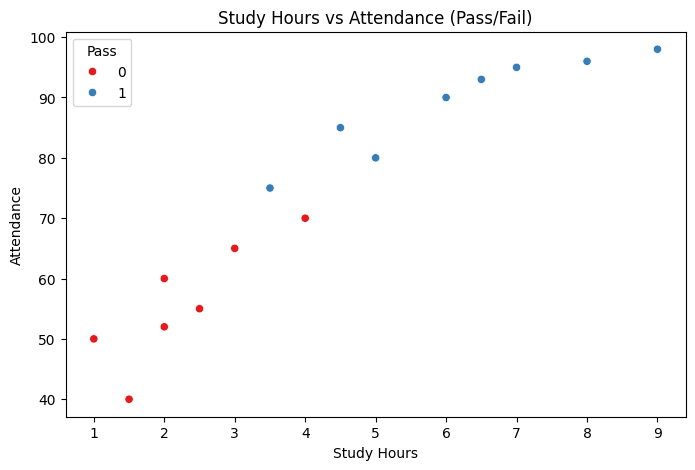

In [ ]:
# Step 3: Data Exploration
print("\nDataset Preview:")
print(df.head())

print("\nChecking for missing values:")
print(df.isnull().sum())

# Visualizing Study Hours vs Attendance
plt.figure(figsize=(8, 5))
sns.scatterplot(x='Study Hours', y='Attendance', hue='Pass', data=df, palette='Set1')
plt.title('Study Hours vs Attendance (Pass/Fail)')
plt.show()

In [ ]:
# Step 4: Split Data
X = df[['Study Hours', 'Attendance']]
y = df['Pass']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Step 5: Train Logistic Regression Model
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [ ]:
# Step 6: Predictions
y_pred = model.predict(X_test)

In [ ]:
# Step 7: Model Evaluation
accuracy = accuracy_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)

print(f"\nAccuracy: {accuracy:.2f}")


Accuracy: 1.00


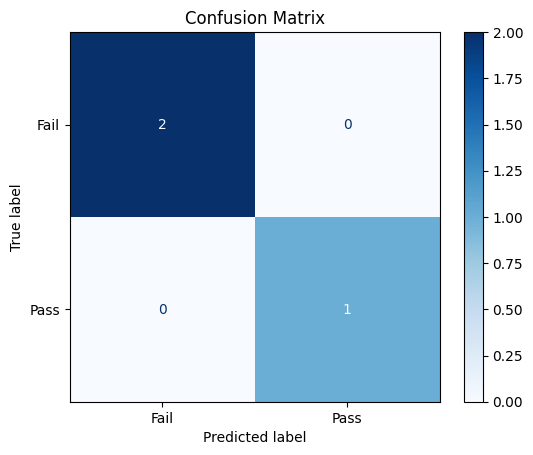

In [ ]:
# Display Confusion Matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Fail", "Pass"])
disp.plot(cmap='Blues')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
# Step 8: Insights
print("\nModel Coefficients (Impact of features):")
coefficients = pd.DataFrame(model.coef_[0], index=X.columns, columns=["Coefficient"])
print(coefficients)

print("\nInsight: Higher study hours and attendance are strongly associated with passing.")


Model Coefficients (Impact of features):
             Coefficient
Study Hours    -0.059434
Attendance      0.738628

Insight: Higher study hours and attendance are strongly associated with passing.


## Task 2: Sentiment Analysis with Natural Language Processing

In [ ]:
# Install
!pip install -q spacy
!python -m spacy download en_core_web_sm

In [2]:
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import spacy
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score,
    f1_score, confusion_matrix, classification_report
)

# Load spaCy English model
nlp = spacy.load("en_core_web_sm")

In [3]:
# Upload the file if running in Colab
from google.colab import files
uploaded = files.upload()

# Load the dataset
df = pd.read_csv('reviews.csv')
print(df.head())

Saving reviews.csv to reviews.csv
                                        product_name product_price Rate  \
0  Candes 12 L Room/Personal Air Cooler??????(Whi...          3999    5   
1  Candes 12 L Room/Personal Air Cooler??????(Whi...          3999    5   
2  Candes 12 L Room/Personal Air Cooler??????(Whi...          3999    3   
3  Candes 12 L Room/Personal Air Cooler??????(Whi...          3999    1   
4  Candes 12 L Room/Personal Air Cooler??????(Whi...          3999    3   

            Review                                            Summary  \
0           super!  great cooler excellent air flow and for this p...   
1          awesome              best budget 2 fit cooler nice cooling   
2             fair  the quality is good but the power of air is de...   
3  useless product                  very bad product its a only a fan   
4             fair                                      ok ok product   

  Sentiment  
0  positive  
1  positive  
2  positive  
3  negative  
4   ne

In [4]:
# Clean column names (remove spaces)
df.columns = df.columns.str.strip()

# Check available columns
print("Available columns:", df.columns.tolist())

Available columns: ['product_name', 'product_price', 'Rate', 'Review', 'Summary', 'Sentiment']


In [5]:
# Automatically identify 'review' and 'sentiment' columns
review_col = None
sentiment_col = None

for col in df.columns:
    if 'review' in col.lower():
        review_col = col
    if 'sentiment' in col.lower():
        sentiment_col = col

print(f"Review column: {review_col}")
print(f"Sentiment column: {sentiment_col}")

Review column: Review
Sentiment column: Sentiment


In [6]:
# Function to clean and lemmatize text
def preprocess(text):
    text = text.lower()
    text = re.sub(r'[^\w\s]', '', text)
    text = re.sub(r'\d+', '', text)
    doc = nlp(text)
    tokens = [token.lemma_ for token in doc if not token.is_stop and token.is_alpha]
    return ' '.join(tokens)

# Apply preprocessing
df = df[[review_col, sentiment_col]].dropna().reset_index(drop=True) # Add reset_index(drop=True) here
df['Cleaned_Review'] = df[review_col].astype(str).apply(preprocess)

# Preview cleaned data
df[[review_col, 'Cleaned_Review', sentiment_col]].head()

,Review,Cleaned_Review,Sentiment
0,super!,super,positive
1,awesome,awesome,positive
2,fair,fair,positive
3,useless product,useless product,negative
4,fair,fair,neutral


In [7]:
# Drop rows with missing values in Review or Sentiment
df.dropna(subset=['Review', 'Sentiment'], inplace=True)

# Now map sentiment to 0/1
df['Sentiment'] = df['Sentiment'].map({'positive': 1, 'negative': 0})

# Optional: drop rows where sentiment was neither positive nor negative
df.dropna(subset=['Sentiment'], inplace=True)

In [9]:
# Convert text to TF-IDF vectors
tfidf = TfidfVectorizer()
X = tfidf.fit_transform(df['Cleaned_Review'])

# Convert sentiment to binary
y = df[sentiment_col]

In [10]:
X = tfidf.fit_transform(df['Cleaned_Review']).toarray()
y = df['Sentiment']

In [14]:
# Split the model
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [15]:
# Train the model
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [16]:
# Clean the test set: remove rows where y_test is NaN
mask = ~pd.isnull(y_test)
valid_indices = np.where(mask)[0]

X_test_clean = X_test[valid_indices]
y_test_clean = y_test.iloc[valid_indices]  # use .iloc if y_test is a Series

# Predict
y_pred = model.predict(X_test_clean)

# Evaluate
print("Accuracy:", accuracy_score(y_test_clean, y_pred))
print("Precision:", precision_score(y_test_clean, y_pred, pos_label=1.0))  # or pos_label=1
print("Recall:", recall_score(y_test_clean, y_pred, pos_label=1.0))
print("F1 Score:", f1_score(y_test_clean, y_pred, pos_label=1.0))

# Detailed classification report (auto-detects labels)
print("\nClassification Report:\n", classification_report(y_test_clean, y_pred))

Accuracy: 0.9571336985662665
Precision: 0.9626035581080635
Recall: 0.9885431496169751
F1 Score: 0.9754009264368969

Classification Report:
               precision    recall  f1-score   support

         0.0       0.92      0.76      0.83      4814
         1.0       0.96      0.99      0.98     29502

    accuracy                           0.96     34316
   macro avg       0.94      0.88      0.90     34316
weighted avg       0.96      0.96      0.96     34316



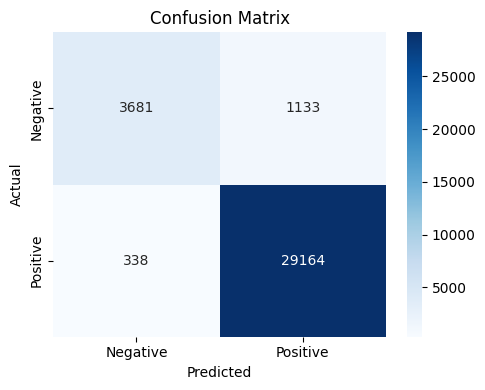

In [17]:
# Predict on the clean test set
y_pred = model.predict(X_test_clean)

# Confusion matrix
cm = confusion_matrix(y_test_clean, y_pred)

# Plot
plt.figure(figsize=(5, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Negative', 'Positive'],
            yticklabels=['Negative', 'Positive'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.tight_layout()
plt.show()

In [19]:
test_results = pd.DataFrame({
    'Review Text': df.loc[y_test_clean.index][review_col], # Use y_test_clean.index and review_col
    'Sentiment': y_test_clean.values, # Use y_test_clean.values
    'Predicted': y_pred
})

# Correctly classified samples
print("\nCorrectly classified positive reviews:")
print(test_results[(test_results['Sentiment'] == 1) & (test_results['Predicted'] == 1)].head(3)['Review Text'])
print("\nCorrectly classified negative reviews:")
print(test_results[(test_results['Sentiment'] == 0) & (test_results['Predicted'] == 0)].head(3)['Review Text'])

# Misclassified samples
print("\nIncorrectly classified as positive:")
print(test_results[(test_results['Sentiment'] == 0) & (test_results['Predicted'] == 1)].head(3)['Review Text'])
print("\nIncorrectly classified as negative:")
print(test_results[(test_results['Sentiment'] == 1) & (test_results['Predicted'] == 0)].head(3)['Review Text'])


Correctly classified positive reviews:
133769          great product
39685        perfect product!
160332    best in the market!
Name: Review Text, dtype: object

Correctly classified negative reviews:
27724                     horrible
73221    did not meet expectations
7181                unsatisfactory
Name: Review Text, dtype: object

Incorrectly classified as positive:
15257               nice
174594    decent product
94895               fair
Name: Review Text, dtype: object

Incorrectly classified as negative:
178764          could be way better
16297     expected a better product
109404                    very poor
Name: Review Text, dtype: object


In [20]:
# Top positive and negative words
feature_names = np.array(tfidf.get_feature_names_out())
coefficients = model.coef_[0]

top_pos_idx = np.argsort(coefficients)[-10:]
top_neg_idx = np.argsort(coefficients)[:10]

print("\nTop Positive Sentiment Words:\n", feature_names[top_pos_idx])
print("\nTop Negative Sentiment Words:\n", feature_names[top_neg_idx])


Top Positive Sentiment Words:
 ['super' 'awesome' 'brilliant' 'wow' 'buy' 'worth' 'fabulous' 'terrific'
 'market' 'highly']

Top Negative Sentiment Words:
 ['terrible' 'useless' 'bad' 'expect' 'waste' 'hate' 'worthless'
 'recommend' 'poor' 'unsatisfactory']


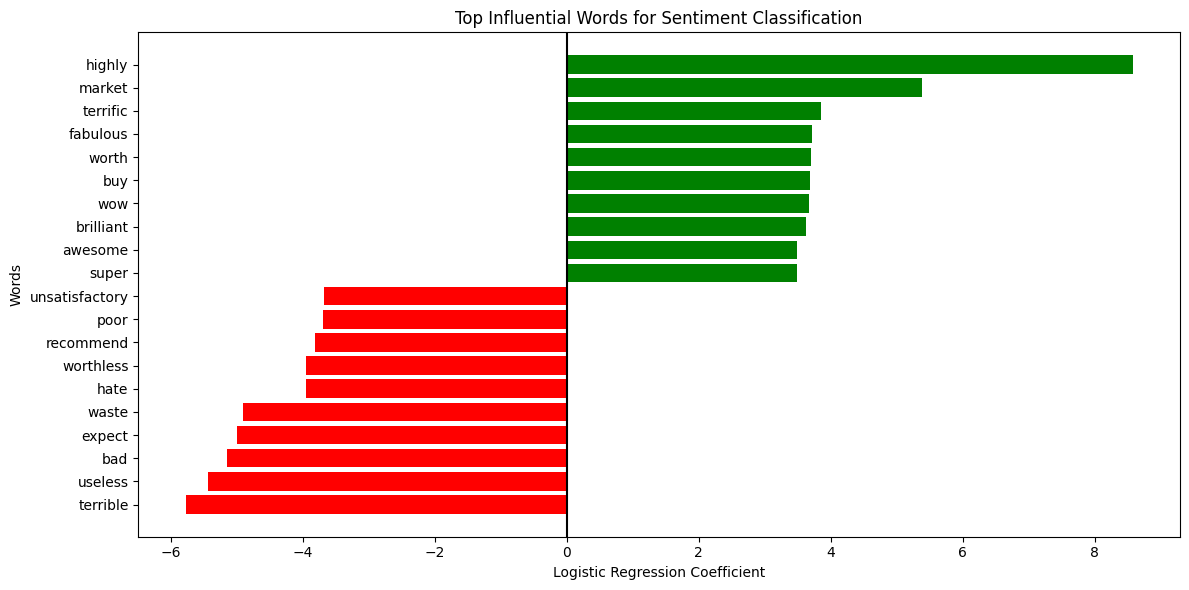

In [21]:
# Extract top positive and negative word coefficients
feature_names = np.array(tfidf.get_feature_names_out())
coefficients = model.coef_[0]

# Sort features
top_n = 10
top_pos_idx = np.argsort(coefficients)[-top_n:]
top_neg_idx = np.argsort(coefficients)[:top_n]

top_features = np.concatenate([top_neg_idx, top_pos_idx])
top_words = feature_names[top_features]
top_coeffs = coefficients[top_features]

# Create bar plot
plt.figure(figsize=(12, 6))
colors = ['red'] * top_n + ['green'] * top_n
plt.barh(top_words, top_coeffs, color=colors)
plt.axvline(0, color='black')
plt.title("Top Influential Words for Sentiment Classification")
plt.xlabel("Logistic Regression Coefficient")
plt.ylabel("Words")
plt.tight_layout()
plt.show()